Megan Sharkey<br>

Upon loading my IC files into MITgcm, some issues came up. To fix these problems, I downloaded the T and S output files from an initial run, and loaded them in below. I found some areas that needed to be filled in, and recreated my IC files for theta and salt, calling them theta_IC_filled.bin and salt_IC_filled.bin. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import netCDF4 as nc4
from eccoseas.downscale import vertical


In [7]:
input_dir = '/Users/msharkey/Documents/MLML/FALL 2025/MS 274/lectures/week 12/'

In [8]:
T_file = os.path.join(input_dir, 'T.0000000000.data')
S_file = os.path.join(input_dir, 'S.0000000000.data')

In [9]:
T = np.fromfile(T_file, '>f4').reshape(45, 540, 720)
T[:,:,-1] = 0
S = np.fromfile(S_file, '>f4').reshape(45, 540, 720)
S[:,:,-1] = 0

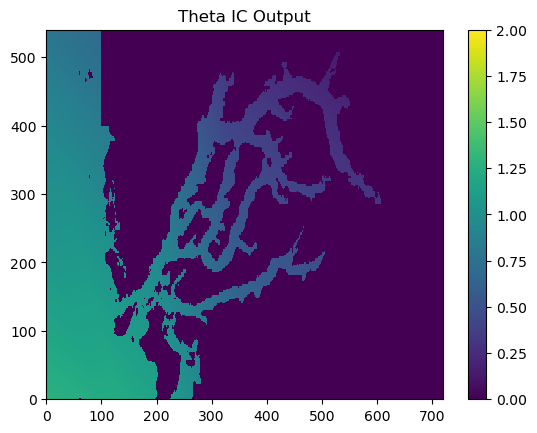

In [10]:
plt.pcolormesh(T[10,:,:], vmax = 2)
plt.title('Theta IC Output')
plt.colorbar()

In [14]:
hfacC_file = os.path.join(input_dir, 'hFacC.data')

In [15]:
hfacC = np.fromfile(hfacC_file, '>f4').reshape(45, 540, 720)

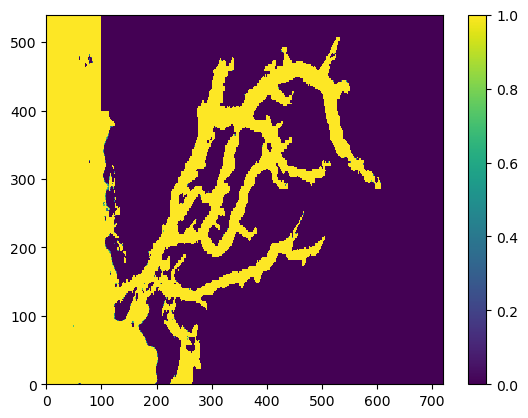

In [16]:
plt.pcolormesh(hfacC[10,:,:], vmax = 1)
plt.colorbar()

In [17]:
maskC = (hfacC>0).astype(int)
maskT = (T!=0).astype(int)
maskS = (S!=0).astype(int)

In [18]:
np.sum(maskT!=maskC)

np.int64(41167)

In [19]:
np.where(maskT!=maskC)


(array([ 3,  3,  3, ..., 44, 44, 44], shape=(41167,)),
 array([  0,   1,   2, ..., 160, 160, 160], shape=(41167,)),
 array([207, 207, 222, ..., 352, 353, 354], shape=(41167,)))

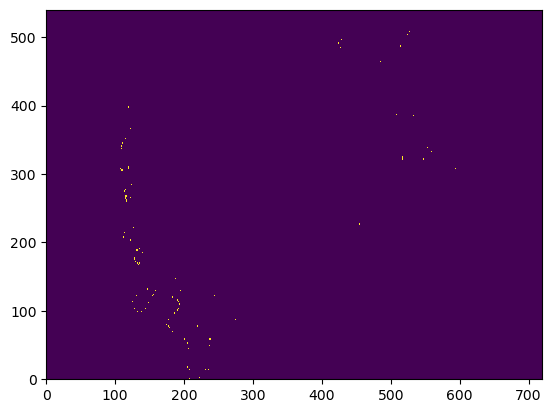

In [20]:
plt.pcolormesh(maskC[3, :, :]-maskT[3,:,:])

In [21]:
T_filled = np.copy(T)

for k in range(1, T.shape[0]):
    
    for i in range(T.shape[1]):

        for j in range(T.shape[2]):
            if maskC[k,i,j] != maskT[k,i,j]:
                T_filled[k,i,j] = T[k-1,i,j]
    

In [22]:
S_filled = np.copy(S)

for k in range(1, S.shape[0]):
    
    for i in range(S.shape[1]):

        for j in range(S.shape[2]):
            if maskC[k,i,j] != maskS[k,i,j]:
                S_filled[k,i,j] = S[k-1,i,j]
    

In [23]:
T_filled.ravel('C').astype('>f4').tofile('theta_IC_filled.bin')
S_filled.ravel('C').astype('>f4').tofile('salt_IC_filled.bin')

In [24]:
Salt_file = 'salt_IC_filled.bin'

In [25]:
S = np.fromfile(Salt_file, '>f4').reshape(45, 540, 720)

In [26]:
print(np.max(S))

34.929333
